# SGD 


In [18]:
# 로지스틱 회귀
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import pandas as pd
url="https://bit.ly/fish_csv_data"
fish=pd.read_csv(url)

In [20]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [21]:
pd.unique(fish["Species"])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [22]:
fish_input=fish[["Weight",	"Length",	"Diagonal",	"Height",	"Width"]]
fish_target=fish["Species"]

In [23]:
fish_target=fish_target.to_numpy()
fish_input=fish_input.to_numpy()

In [24]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(fish_input,fish_target,random_state=42)

In [25]:

# 정규화 -> 데이터의 속성 값의 척도(scale)이 다른 경우, 일관된 크기로 변경하기 위해서 한다.
from sklearn.preprocessing import StandardScaler
# StandardScaler 초기화
ss= StandardScaler()
# 입력 값 train_input를 받아서 정규화에  사용할 평균, 표준편차를 구한다.
ss.fit(train_input)
#각 컬럼의 값을 표준화 한다.
train_scaled=ss.transform(train_input) ## 각 칼럼의 (실제 값- 평균)/ (표준편차)를 구해준다.
test_scaled=ss.transform(test_input)


# 모델링

In [26]:
from sklearn.linear_model import SGDClassifier

sc= SGDClassifier(loss="log_loss",max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

c:\Anaconda\envs\mlbasic\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [27]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [28]:
test_input[:5] ## 정규화 되지 않은 값

array([[ 78.    ,  18.7   ,  19.4   ,   5.1992,   3.1234],
       [ 13.4   ,  12.4   ,  13.5   ,   2.43  ,   1.269 ],
       [200.    ,  32.3   ,  34.8   ,   5.568 ,   3.3756],
       [270.    ,  26.    ,  28.7   ,   8.3804,   4.2476],
       [150.    ,  23.    ,  24.5   ,   5.2185,   3.626 ]])

In [29]:
test_scaled[:5] ## 정규화된 값

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [30]:
sc.predict(test_input[:5]) ## test_input에 클래스를 예측해본다.

array(['Pike', 'Pike', 'Smelt', 'Smelt', 'Smelt'], dtype='<U9')

In [31]:
print(sc.classes_) ## 클래스의 종류를 나타낸다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [32]:
proba=sc.predict_proba(test_scaled[:5]) ## 예측하는 값의 확률을 구해준다.

In [33]:
print(np.round(proba,decimals=3)) ## 소수점 셋째 자리까지 확률을 보여준다.

[[0.    0.    0.522 0.    0.478 0.    0.   ]
 [0.    0.999 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.989 0.011 0.    0.   ]
 [0.    0.    0.025 0.    0.975 0.    0.   ]
 [0.    0.    0.597 0.    0.403 0.    0.   ]]


In [34]:
#z1,z2,z3...z7
decision=sc.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[-45.39 -12.33   8.22 -38.03   2.36 -45.46  -8.76]
 [-62.25  -4.79 -16.24 -36.55 -12.59 -13.94 -13.34]
 [-35.87 -65.77 -32.75  -3.25  -7.82 -29.58 -26.12]
 [-23.57 -30.04  -8.02 -35.16  -4.35 -62.63 -17.69]
 [-44.68 -35.27   7.07 -25.95   0.73 -45.41 -13.14]]


In [35]:
# Softmax 계산 => proba가 Softmax의 값인것을 알 수 있다.
from scipy.special import softmax

proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.    0.997 0.    0.003 0.    0.   ]
 [0.    0.999 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.99  0.01  0.    0.   ]
 [0.    0.    0.025 0.    0.975 0.    0.   ]
 [0.    0.    0.998 0.    0.002 0.    0.   ]]


In [36]:
# max iteration 변경
from sklearn.linear_model import SGDClassifier

sc= SGDClassifier(loss="log_loss",max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

c:\Anaconda\envs\mlbasic\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [37]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [38]:
# Partial Fitting(부분적 적합)
from sklearn.linear_model import SGDClassifier
lr= SGDClassifier(loss="log_loss",max_iter=10,random_state=42)
lr.fit(train_scaled,train_target)

c:\Anaconda\envs\mlbasic\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [39]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [40]:
lr.partial_fit(train_scaled,train_target)

SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [41]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


# 최적의 max iteration 찾기

In [ ]:
lr=SGDClassifier(loss="log_loss",random_state=42)

train_score=[] # 학습 성과 저장
test_score=[] # 검증 성과 저장

# 예측하는 클래스 리스트 
classes=np.unique(train_target)

for _ in range(0,300):
    lr.partial_fit(train_scaled,train_target,classes=classes) ## classes는 예측하는 클래스의 종류를 지정해준다.

    
    # print(lr.score(train_scaled,train_target))
    # print(lr.score(test_scaled,test_target))
    # 반복 학습, 검증 성과 저장
    train_score.append(lr.score(train_scaled,train_target))
    test_score.append(lr.score(test_scaled,test_target))

In [43]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [44]:
test_score

[0.65,
 0.55,
 0.575,
 0.7,
 0.7,
 0.7,
 0.725,
 0.7,
 0.775,
 0.8,
 0.825,
 0.875,
 0.875,
 0.9,
 0.875,
 0.875,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.925,
 0.9,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.9,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9

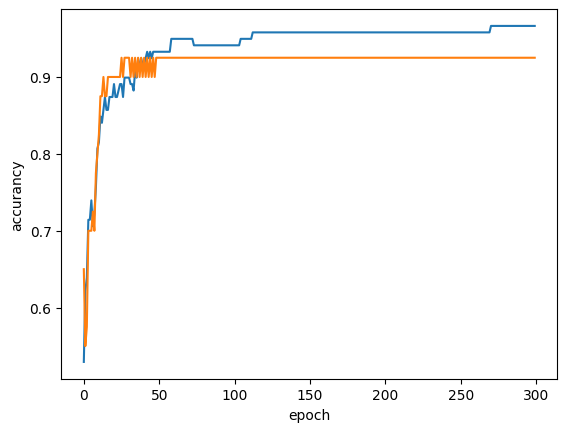

In [45]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accurancy")
plt.show()

In [46]:
# Partial Fitting(부분적 적합)
from sklearn.linear_model import SGDClassifier
lr= SGDClassifier(loss="log_loss",max_iter=100, tol=None,random_state=42)
lr.fit(train_scaled,train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

In [47]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.957983193277311
0.925


In [48]:
# Partial Fitting(부분적 적합)
from sklearn.linear_model import SGDClassifier
lr= SGDClassifier(loss="hinge",max_iter=100, tol=None,random_state=42)
lr.fit(train_scaled,train_target)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [49]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9495798319327731
0.925
